In [45]:
%matplotlib inline 
from IPython.core.display import display

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from sympy import *
from sympy.utilities.lambdify import lambdify
import matplotlib.figure
init_printing()
#from math import *
from interval import interval, inf
from interval import imath
import sys
from pprint import pprint
import datetime
import os

In [16]:
! echo '' > find_all_solution.out
from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import (
    NelderMead,
)

## RASTRIGIN FUNCTION
https://www.sfu.ca/~ssurjano/rastr.html

In [46]:
num = 2
args = (x_1, x_2)= symbols("x1:{}".format(num+1))
var('a,b,c,d')
f_expr = 10*2
for x in args:
    f_expr += x**2 - 10*cos(2*pi*x)
display(f_expr)

19.8990749901
0.994959057993


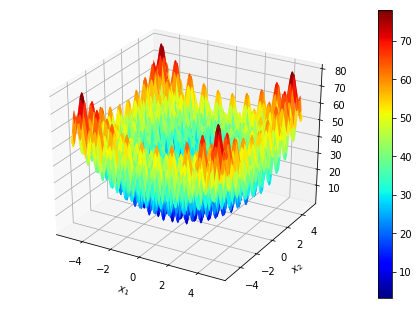

In [47]:
np_func = lambdify([args], f_expr, modules=np)
# seed_num = 324
# np.random.seed(seed_num)
low = -5.12
high = 5.12
points = np.random.uniform(low=low, high=high, size=(3,2))
nelder = NelderMead(np_func, points)
local_minima, points_history = nelder.run()
print local_minima

x = np.arange(low, high, 0.05) 
y = np.arange(low, high, 0.05) 
X, Y = np.meshgrid(x, y)
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis].tolist()
Z = np.array([-nelder.func(_args) for _args in args_list]).reshape(X.shape)

#nelder.save_figs(X, Y, Z, points_history)

for i in range(20):
    points = np.random.uniform(low=low, high=high, size=(3,2))
    nelder = NelderMead(np_func, points)
    _local_minima, points_history = nelder.run()
    local_minima = min(local_minima, _local_minima)
print local_minima

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X,Y,-Z, rstride=3, cstride=5, cmap=cm.jet, linewidth=1) 
fig.colorbar(surf)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [48]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [49]:
X = ip([
    [interval[-5.12, 5.121]],
    [interval[-5.12, 5.121]],    
])

In [50]:
kra = Krawczyk(df, ddf, X)

In [51]:
import time
st = time.time()
ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(
    f, tmp_min_sup=local_minima ,trace=True, cnt_max=5000)
print("{:.3f}[sec]".format(time.time() - st))

Loop end. cnt:112, len(S):0, len(T):3, len(U):0

112
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([-0.994958637652335, -0.9949586376523345])],
  [interval([-5e-324, 5e-324])]],
 [[interval([-5e-324, 5e-324])],
  [interval([-0.994958637652335, -0.9949586376523345])]],
 [[interval([-5e-324, 5e-324])], [interval([-5e-324, 5e-324])]]]
最小値の上限値: 7.1054273576e-15
0.998[sec]


In [53]:
skip_num = max(len(animation_box) / 20, 2)
print(skip_num)
visualize_optimization_log(kra, f, animation_box, skip=skip_num)

5
Start saveing images in image/20180103_103854 dirctory.
Finish saveing images in image/20180103_103854 dirctory.
